## Librerias

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

## Carga csv

In [117]:
# Cargamos el dataset
path = '../../datos/procesados/datos_codificados.csv'
df = pd.read_csv(path, sep=',')

In [118]:
df['APOE Genotype'].unique()

array([3.4, 3.3, 2.3, 4.4, 2.4, 2.2])

In [119]:
df.sample(4, random_state=27)

,Unnamed: 0,DX,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB
609,114,2,60.3,1,18,1,2,0,29,1,3.4,2
376,386,1,73.4,0,12,1,2,1,30,1,3.3,1
370,479,2,73.6,1,14,1,2,0,25,1,3.4,2
13,385,2,87.1,1,16,1,2,2,24,1,3.3,2


### Adaptacion del csv

In [120]:
df.reset_index(drop=True, inplace=True)

In [121]:
df.drop('Unnamed: 0', axis='columns', inplace=True)

In [122]:
df['AGE'] = df['AGE'].round().astype(int)

In [123]:
df['APOE Genotype'].unique()

array([3.4, 3.3, 2.3, 4.4, 2.4, 2.2])

In [124]:
#Codificacion

# Obtener los valores únicos de la columna
valores_unicos = df['APOE Genotype'].unique()

# Crear un diccionario que mapea cada valor único a un código único
codigo_valor = {valor: i for i, valor in enumerate(valores_unicos)}

# Mapear los valores en la columna utilizando el diccionario
df['APOE Genotype'] = df['APOE Genotype'].map(codigo_valor)

In [125]:
codigo_valor

{3.4: 0, 3.3: 1, 2.3: 2, 4.4: 3, 2.4: 4, 2.2: 5}

## Modelo

In [126]:
# Separamos el dataset en características (X) y la variable objetivo (y)
X = df.drop('DX_SUB', axis='columns')
y = df['DX_SUB']

# Dividimos el dataset en conjuntos de entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=9)

# Importamos y creamos un modelo de árbol de decisión
tree = DecisionTreeClassifier(max_depth=2, random_state=0)

### Entrenamiento

In [127]:
# Entrenamos el modelo de árbol de decisión
tree.fit(X_train, y_train)

# Calculamos las predicciones en los conjuntos de entrenamiento y prueba
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

### Testeo

In [133]:
# Creamos una instancia del clasificador Random Forest
rf = RandomForestClassifier()

# Definimos un diccionario de parámetros a explorar
parametros = {
  'n_estimators': range(10),  # Prueba valores de 10 a 100 en incrementos de 10 para el número de árboles
  'criterion': ['gini', 'entropy'],  # Prueba ambos criterios de división
  'max_depth': range(2)  # Prueba profundidades de árbol de 2 a 20 en incrementos de 2
}

# Creamos una instancia de GridSearchCV para búsqueda de hiperparámetros
rf_grid = GridSearchCV(rf, parametros, cv=5, scoring='accuracy').fit(X, y)

# Calculamos la matriz de confusión del modelo Random Forest
cm_rf = confusion_matrix(y_test, y_test_pred_rf)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
110 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

In [134]:
# Imprimimos la matriz de confusión
print('Matriz de Confusión (Random Forest):\n', cm_rf)

Matriz de Confusión (Random Forest):
 [[13 32  0]
 [ 4 45  0]
 [ 0  0 95]]


In [135]:
# Calculamos las predicciones del modelo Random Forest en el conjunto de prueba
y_test_pred_rf = rf_grid.predict(X_test)

# Calculamos la precisión del modelo Random Forest en el conjunto de prueba
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Calculamos las predicciones del modelo Random Forest en el conjunto de entrenamiento
y_train_pred_rf = rf_grid.predict(X_train)

# Calculamos la precisión en el conjunto de entrenamiento
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

print('Accuracy en el conjunto de prueba del modelo Random Forest: ', test_accuracy_rf)
print('Accuracy en el conjunto de entrenamiento del modelo Random Forest: ', train_accuracy_rf)

Accuracy en el conjunto de prueba del modelo Random Forest:  0.9365079365079365
Accuracy en el conjunto de entrenamiento del modelo Random Forest:  0.9316628701594533


In [130]:
# Calculamos el reporte de clasificación del modelo Random Forest
report_rf = classification_report(y_test, y_test_pred_rf)

# Imprimimos el reporte de clasificación
print('Reporte de Clasificación (Random Forest):\n', report_rf)

Reporte de Clasificación (Random Forest):
               precision    recall  f1-score   support

           0       0.76      0.29      0.42        45
           1       0.58      0.92      0.71        49
           2       1.00      1.00      1.00        95

    accuracy                           0.81       189
   macro avg       0.78      0.74      0.71       189
weighted avg       0.84      0.81      0.79       189



### Visualizaciones

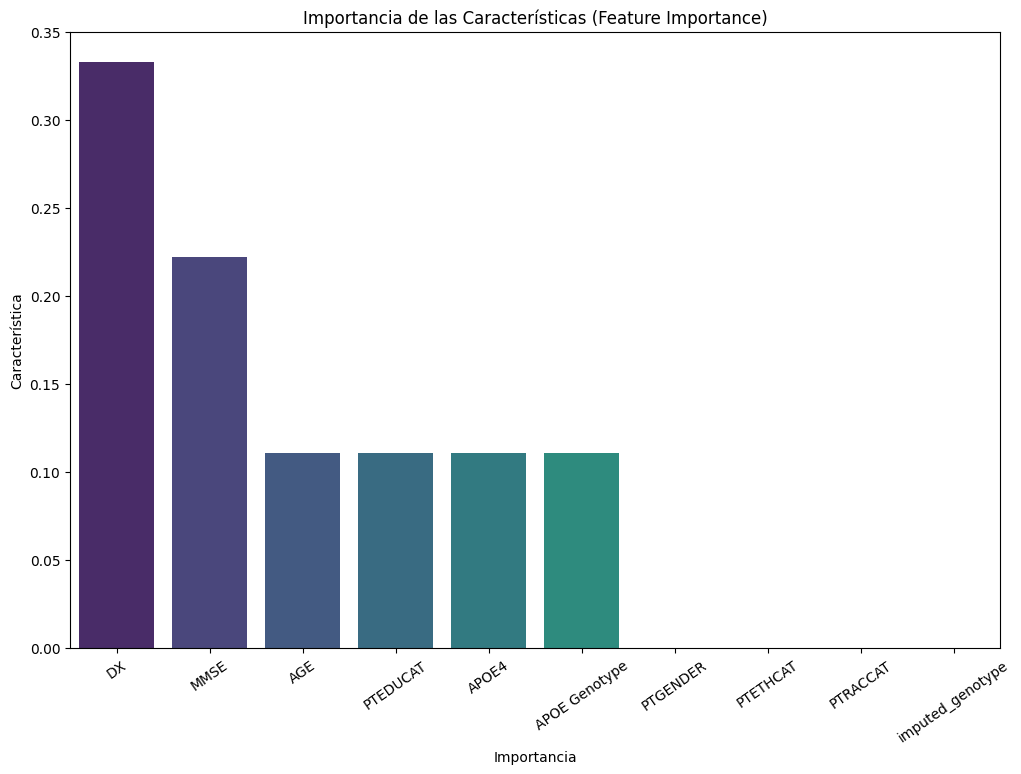

In [139]:
# Verificamos el feature importances
importances = rf_grid.best_estimator_.feature_importances_
columns = X.columns

# Crear un DataFrame para facilitar la visualización
importance_df = pd.DataFrame({'Feature': columns, 'Importance': importances})

# Ordenar el DataFrame por importancia en orden descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Crear una figura más grande para la visualización
plt.figure(figsize=(12, 8))

# Utilizar un gráfico de barras horizontal para mostrar las importancias
sns.barplot(x='Feature', y='Importance', data=importance_df, palette='viridis')

# Rotar las etiquetas en el eje x para mejorar la legibilidad
plt.xticks(rotation=35)

# Establecer un título y etiquetas de los ejes
plt.title('Importancia de las Características (Feature Importance)')
plt.xlabel('Importancia')
plt.ylabel('Característica')

# Mostrar el gráfico
plt.show()


### Conclusion del modelo

El modelo de **Random Forest** ha demostrado un alto nivel de precisión en ambos conjuntos de datos, con un *93.65%* en el conjunto de prueba y un *93.17%* en el conjunto de entrenamiento. Esto indica que el modelo es capaz de predecir con éxito el resultado deseado en la mayoría de las instancias sin caer en sobreajustes.

Las principales características que influyen en las predicciones del modelo son:
- **DX**
- **MMSE**
- **EDAD**
- **PTEDUCAT**
- **GENAPOE4**
- **APOE**